#  Coffee Shop Sales Analysis  

## Project Description
The goal of this project is to analyze the sales data of a coffee shop chain, identify key trends and factors that influence revenue.  
The analysis will help answer the following questions:

- Which products and categories are the most popular?
- What is the sales dynamics over the entire period?
- How sales change throughout the day, week, and time of day?
- Which locations generate the highest revenue?
- What is the average ticket and how many items are usually purchased per transaction?

The obtained insights will be visualized in an interactive Tableau dashboard.

## Dataset Description
The dataset contains coffee shop transactions with the following variables:

- `transaction_id` — unique transaction identifier
- `transaction_date` — date of purchase
- `transaction_time` — time of purchase
- `transaction_qty` — number of items in the transaction
- `store_id` — store ID
- `store_location` — city/store location
- `product_id` — product ID
- `unit_price` — unit price
- `product_category` — product category (coffee, tea, pastry, etc.)
- `product_type` — product subcategory
- `product_detail` — detailed product description

## Data Source
Data obtained from Kaggle [Coffee Shop Sales Datase](https://www.kaggle.com/code/ahmedabbas757/coffee-shop-sales/input) 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First, we will load the data and explore its structure, including the number of rows and columns, data types, and the presence of missing values and duplicates.


In [2]:
df = pd.read_excel(r"D:\Навчання\Data Analytics\КУРС DATA ANALIST\data for traning\Coffee Shop Sales.xlsx")
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [3]:
df.shape

(149116, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [5]:
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [6]:
df.duplicated().any()

np.False_

In [7]:
# Basic statistics for numeric columns
df[['transaction_qty', 'unit_price']].describe()

,transaction_qty,unit_price
count,149116.000000,149116.000000
mean,1.438276,3.382219
std,0.542509,2.658723
min,1.000000,0.800000
25%,1.000000,2.500000
50%,1.000000,3.000000
75%,2.000000,3.750000
max,8.000000,45.000000


## Descriptive Statistics and Outliers

The standard deviation of `transaction_qty` is quite low (0.54), which means that most customers usually purchase only 1–2 items per transaction. In contrast, `unit_price` shows a much higher standard deviation (2.66) relative to its mean (3.38), indicating a wide range of product prices. This spread may reflect the presence of potential outliers.

Let's consider the maximum values for further understanding:

The maximum quantity per transaction is 8 items. Since most transactions consist of 1–2 items, this is unusual but still realistic (e.g., group orders). The maximum unit price is 45, while the 75th percentile is only 3.75. This sharp difference raises suspicion of outliers and requires further investigation.

To better understand these patterns and detect possible anomalies, we will visualize the distributions using histograms and box plots.


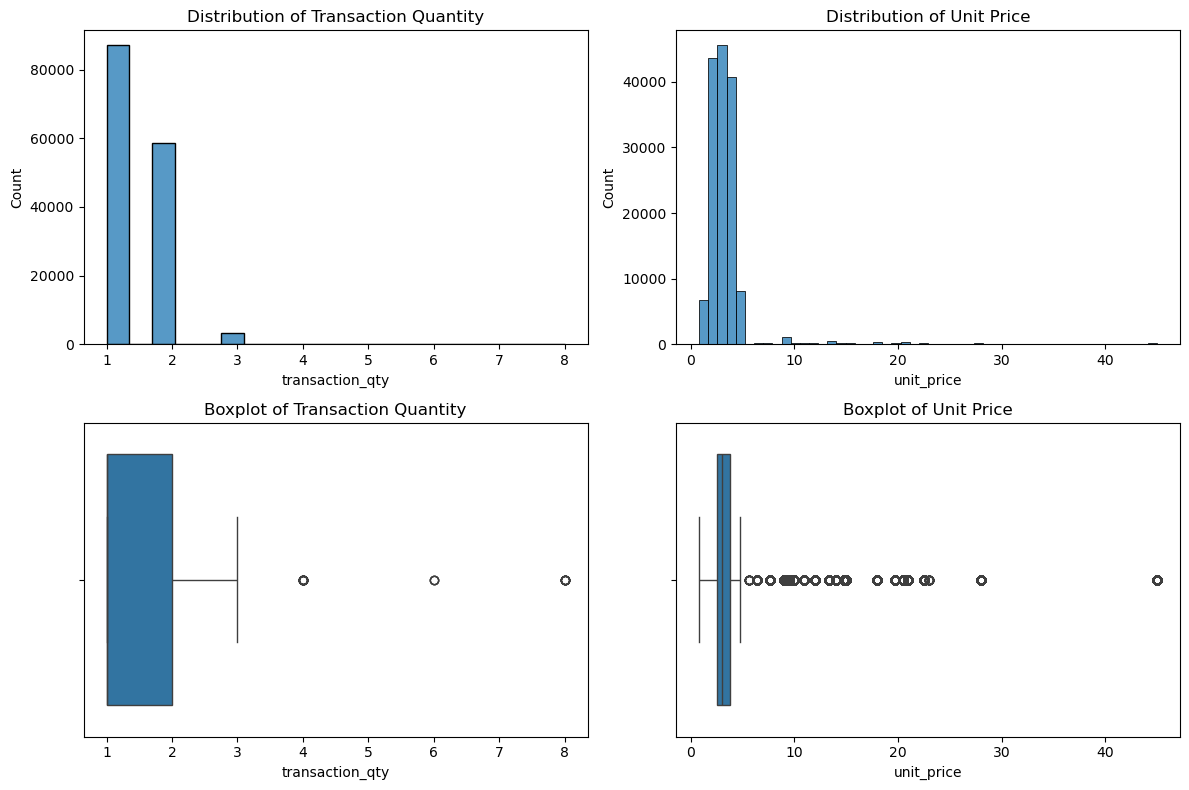

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))

# Distribution of transaction quantity
sns.histplot(df['transaction_qty'], bins=20, ax=axes[0,0])
axes[0,0].set_title("Distribution of Transaction Quantity")

sns.boxplot(x=df['transaction_qty'], ax=axes[1,0])
axes[1,0].set_title("Boxplot of Transaction Quantity")

# Distribution of unit price
sns.histplot(df['unit_price'], bins=50, ax=axes[0,1])
axes[0,1].set_title("Distribution of Unit Price")

sns.boxplot(x=df['unit_price'], ax=axes[1,1])
axes[1,1].set_title("Boxplot of Unit Price")

plt.tight_layout()
plt.show()

## Analysis of Potential Outliers

To check whether the highest prices are true outliers or premium products, we will examine the 10 most expensive items and review their `product_id`, `product_category`, `product_type`, and `product_detail`.  
If these products consistently appear with the same price, it indicates that they are real items rather than data errors.

In [9]:
# Top 10 by Price
df.sort_values(by="unit_price", ascending=False).head(10)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
64745,64915,2023-04-12,16:44:10,1,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat
125082,125419,2023-06-10,15:52:18,1,5,Lower Manhattan,8,45.0,Coffee beans,Premium Beans,Civet Cat
136500,136837,2023-06-20,07:50:58,1,3,Astoria,8,45.0,Coffee beans,Premium Beans,Civet Cat
136393,136730,2023-06-19,19:37:12,1,3,Astoria,8,45.0,Coffee beans,Premium Beans,Civet Cat
8443,8473,2023-01-15,18:18:51,1,3,Astoria,8,45.0,Coffee beans,Premium Beans,Civet Cat
8473,8503,2023-01-15,19:37:12,1,3,Astoria,8,45.0,Coffee beans,Premium Beans,Civet Cat
64674,64844,2023-04-12,15:16:12,1,5,Lower Manhattan,8,45.0,Coffee beans,Premium Beans,Civet Cat
96311,96565,2023-05-15,18:18:51,1,3,Astoria,8,45.0,Coffee beans,Premium Beans,Civet Cat
30357,30414,2023-02-23,09:25:03,1,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat
48232,48339,2023-03-21,20:52:55,1,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat


In [10]:
# Top 10 products by Max Price
df.groupby(['product_id', 'product_category', 'product_type', 'product_detail'])['unit_price'] \
  .max().sort_values(ascending=False).head(10)

product_id  product_category  product_type       product_detail           
8           Coffee beans      Premium Beans      Civet Cat                    45.00
9           Coffee beans      Organic Beans      Organic Decaf Blend          28.00
81          Branded           Clothing           I Need My Bean! T-shirt      28.00
82          Branded           Housewares         I Need My Bean! Diner mug    23.00
83          Branded           Housewares         I Need My Bean! Latte cup    23.00
6           Coffee beans      Gourmet Beans      Ethiopia                     21.00
4           Coffee beans      Espresso Beans     Primo Espresso Roast         20.45
7           Coffee beans      Premium Beans      Jamacian Coffee River        19.75
2           Coffee beans      House blend Beans  Our Old Time Diner Blend     18.00
1           Coffee beans      Organic Beans      Brazilian - Organic          18.00
Name: unit_price, dtype: float64

In [11]:
# Top 10 products by Max quantity
df.groupby(['product_id', 'product_category', 'product_type', 'product_detail'])['transaction_qty'] \
  .max().sort_values(ascending=False).head(10)

product_id  product_category  product_type           product_detail             
8           Coffee beans      Premium Beans          Civet Cat                      8
82          Branded           Housewares             I Need My Bean! Diner mug      6
83          Branded           Housewares             I Need My Bean! Latte cup      4
65          Flavours          Sugar free syrup       Sugar Free Vanilla syrup       4
64          Flavours          Regular syrup          Hazelnut syrup                 4
63          Flavours          Regular syrup          Carmel syrup                   4
41          Coffee            Barista Espresso       Cappuccino Lg                  4
26          Coffee            Organic brewed coffee  Brazilian Rg                   3
23          Coffee            Drip coffee            Our Old Time Diner Blend Rg    3
22          Coffee            Drip coffee            Our Old Time Diner Blend Sm    3
Name: transaction_qty, dtype: int64

The highest prices correspond to premium coffee beans and branded merchandise, which confirms that the dataset reflects a wide price range rather than data errors.  
The large number of items per transaction also makes sense for these products, representing bulk purchases.

Overall, neither high prices nor large quantities are outliers — they reflect actual customer behavior and product diversity.

## Data Type Conversion
For easier grouping and memory optimization, we will convert the following columns to categorical variables:  
`product_category`, `product_type`, `product_detail`, and `store_location`.

In [12]:
categorical_cols = ['product_category', 'product_type', 'product_detail', 'store_location']
for col in categorical_cols:
    df[col] = df[col].astype('category')

df.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location            category
product_id                   int64
unit_price                 float64
product_category          category
product_type              category
product_detail            category
dtype: object

For further calculations, we will extract the following variables from the date:

- Year, month, and day  
- Day of the week (`weekday`)  
- Hour, to analyze the time of purchase


In [13]:
import warnings
warnings.filterwarnings('ignore')

df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month
df['day'] = df['transaction_date'].dt.day
df['weekday'] = df['transaction_date'].dt.day_name()

df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.time
df['hour'] = pd.to_datetime(df['transaction_time'].astype(str)).dt.hour

## Sales Overview
We will calculate the total sales amount for each transaction.

Then, we’ll look at sales by month, location, and top product categories.


In [14]:
# Total Sales per Transaction
df['total_price'] = df['transaction_qty'] * df['unit_price']

In [15]:
# Monthly Sales
df.groupby('month')['total_price'].sum()

month
1     81677.74
2     76145.19
3     98834.68
4    118941.08
5    156727.76
6    166485.88
Name: total_price, dtype: float64

In [16]:
# Sales by Store / Location
df.groupby('store_location')['total_price'].sum().sort_values(ascending=False)

store_location
Hell's Kitchen     236511.17
Astoria            232243.91
Lower Manhattan    230057.25
Name: total_price, dtype: float64

In [17]:
# Sales by Product Category
df.groupby('product_category')['total_price'].sum().sort_values(ascending=False)

product_category
Coffee                269952.45
Tea                   196405.95
Bakery                 82315.64
Drinking Chocolate     72416.00
Coffee beans           40085.25
Branded                13607.00
Loose Tea              11213.60
Flavours                8408.80
Packaged Chocolate      4407.64
Name: total_price, dtype: float64

In [18]:
# Sales by Product Category (by Quantity Sold)
df.groupby('product_category')['transaction_qty'].sum().sort_values(ascending=False)

product_category
Coffee                89250
Tea                   69737
Bakery                23214
Drinking Chocolate    17457
Flavours              10511
Coffee beans           1828
Loose Tea              1210
Branded                 776
Packaged Chocolate      487
Name: transaction_qty, dtype: int64

In [19]:
pivot_store_month = df.pivot_table(
    index='store_location',
    columns='month',
    values='total_price',
    aggfunc='sum'
)

pivot_store_month

month,1,2,3,4,5,6
store_location,,,,,,
Astoria,27313.66,25105.34,32835.43,39477.61,52428.76,55083.11
Hell's Kitchen,27820.65,25719.80,33110.57,40304.14,52598.93,56957.08
Lower Manhattan,26543.43,25320.05,32888.68,39159.33,51700.07,54445.69


From our analysis, we can observe a positive sales trend over the months. There was a slight dip in February, but by March sales had grown noticeably, and this upward trend continued.  
It is also worth noting that the growth is consistent across all store locations. Hell's Kitchen is the sales leader, but the differences between locations are not significant.

Among product categories, the top performers are Coffee, Tea, and Bakery.


## Average Check

We will check whether the dataset contains multi-line transactions.  
This will help ensure that the average check is calculated correctly.  

We will also calculate the overall average check for the entire chain, as well as the monthly average check for each coffee shop, and visualize the results.

In [20]:
tx_counts = df.groupby('transaction_id').size()

multi_line_exist = (tx_counts > 1).any()
print("Are there transactions with more than one line?", multi_line_exist)

Are there transactions with more than one line? False


In [21]:
avg_check_total = df['total_price'].mean()
print(f"Average Check for the Entire Chain: {avg_check_total:.2f}")

Average Check for the Entire Chain: 4.69


In [22]:
# Average Check by Coffee Shop
avg_check_by_store = df.groupby('store_location')['total_price'].mean().round(2)
print(avg_check_by_store)

store_location
Astoria            4.59
Hell's Kitchen     4.66
Lower Manhattan    4.81
Name: total_price, dtype: float64


In [23]:
monthly_avg_check = (
    df.groupby(['month', 'store_location'])
      .agg(avg_check=('total_price', 'mean'))
      .reset_index()
)

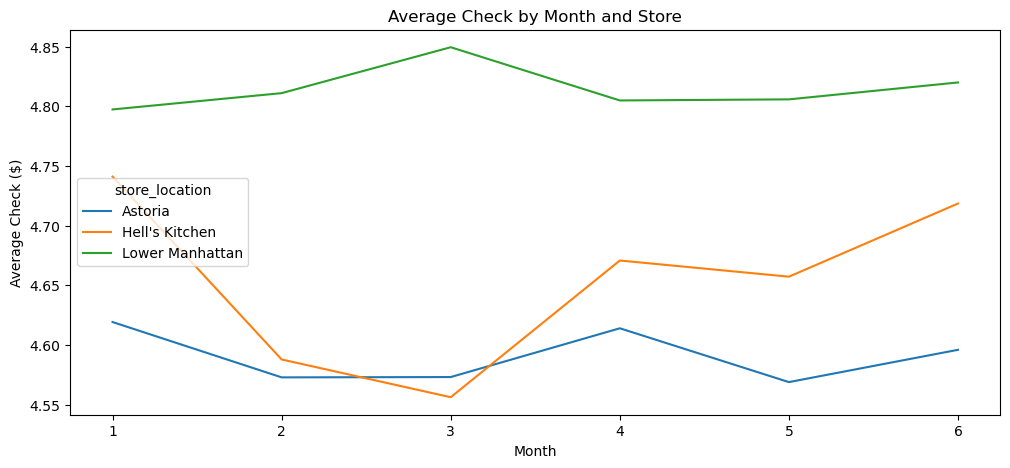

In [24]:
plt.figure(figsize=(12,5))
sns.lineplot(
    data=monthly_avg_check,
    x='month',
    y='avg_check',
    hue='store_location',
    markers=True
)
plt.title("Average Check by Month and Store")
plt.xlabel("Month")
plt.ylabel("Average Check ($)")
plt.show()

From the chart, we can see that the highest average check is in the coffee shop located in **Lower Manhattan**, while the lowest is in **Astoria**.  
The coffee shop in **Hell's Kitchen** shows a drop in the average check during February and March, but starting from April, the situation improved and stabilized.

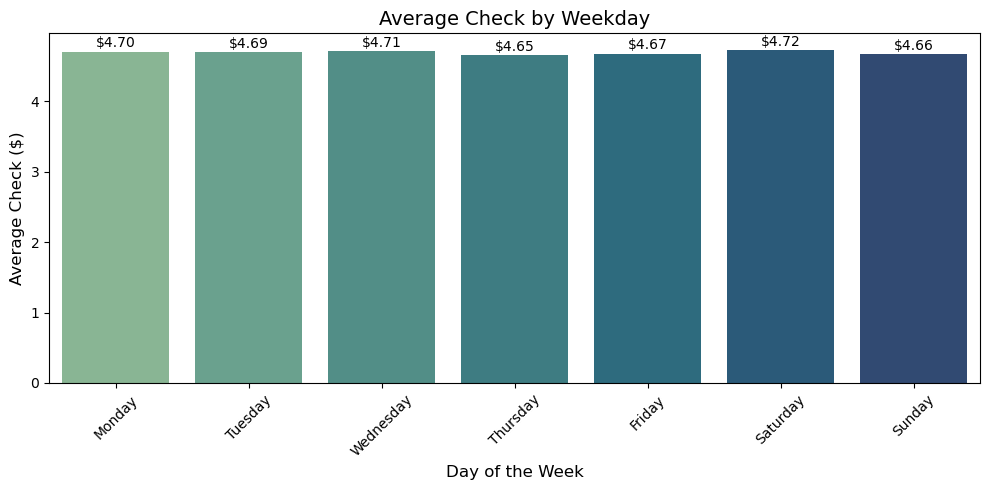

In [25]:
# Calculate the average check by weekday
avg_check_by_weekday = (
    df.groupby('weekday')['total_price']
    .mean()
    .reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
)

# Plot the bar chart
plt.figure(figsize=(10,5))
ax = sns.barplot(
    x=avg_check_by_weekday.index,
    y=avg_check_by_weekday.values,
    palette="crest"
)

# Add title and labels
plt.title("Average Check by Weekday", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Average Check ($)", fontsize=12)
plt.xticks(rotation=45)

# Add labels above bars
for container in ax.containers:
    ax.bar_label(container, fmt="$%.2f", label_type='edge', padding=1, fontsize=10)

plt.tight_layout()
plt.show()


We can observe that the average check remains fairly consistent across all days of the week.


## Sales Patterns and Trends

We will perform a detailed analysis of the coffee shop chain's sales.  
To start, let's look at the dynamics of daily sales.

In [26]:
# Aggregate data by day# Daily sales volume
daily = (
    df.groupby('transaction_date')
    .agg(total_sales=('total_price', 'sum'))  # сума продажів за день
    .reset_index()
    .set_index('transaction_date')
)

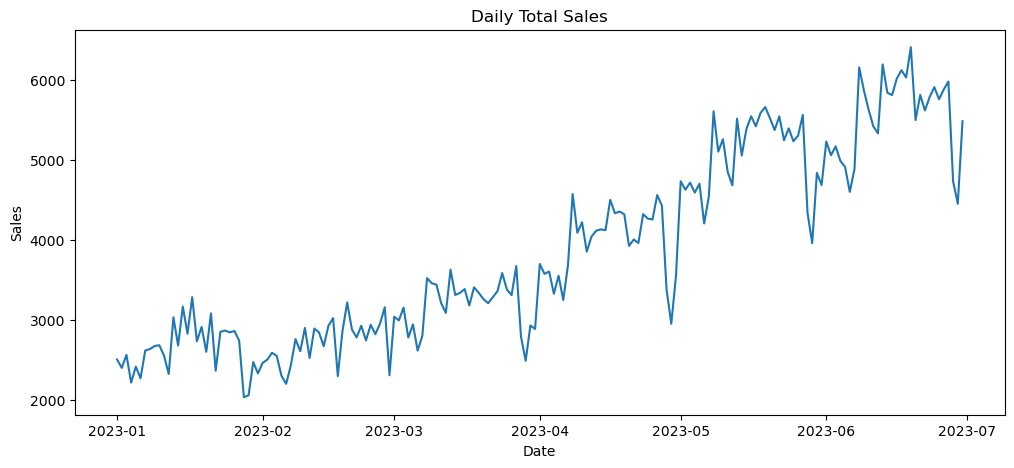

In [27]:
# Daily sales volume
plt.figure(figsize=(12,5))
sns.lineplot(data=daily, x=daily.index, y='total_sales')
plt.title("Daily Total Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

From the chart, we can observe a clear upward trend in sales.  
However, there are also points of extreme drops.  
We need to further analyze which days of the week these are and whether there is any pattern to these declines.

Let's check May, where a noticeable drop occurred.

In [28]:
# Filter for May only
may = df[df['transaction_date'].dt.month == 5]

# Group by date and count the number of transactions per day
daily_may = may.groupby('transaction_date')['transaction_id'].nunique().sort_index()

print(daily_may)

transaction_date
2023-05-01    1050
2023-05-02    1040
2023-05-03    1076
2023-05-04    1029
2023-05-05    1062
2023-05-06     955
2023-05-07    1012
2023-05-08    1186
2023-05-09    1094
2023-05-10    1163
2023-05-11    1067
2023-05-12    1040
2023-05-13    1148
2023-05-14    1071
2023-05-15    1156
2023-05-16    1219
2023-05-17    1014
2023-05-18    1192
2023-05-19    1214
2023-05-20    1166
2023-05-21    1053
2023-05-22    1117
2023-05-23    1075
2023-05-24    1104
2023-05-25    1043
2023-05-26    1089
2023-05-27    1183
2023-05-28     999
2023-05-29     906
2023-05-30    1022
2023-05-31     982
Name: transaction_id, dtype: int64


In [29]:
# Group by date and sum the sales amount for each day
daily_sales_may = may.groupby('transaction_date')['total_price'].sum().sort_index()

print(daily_sales_may)

transaction_date
2023-05-01    4731.45
2023-05-02    4625.50
2023-05-03    4714.60
2023-05-04    4589.70
2023-05-05    4701.00
2023-05-06    4205.15
2023-05-07    4542.70
2023-05-08    5604.21
2023-05-09    5100.97
2023-05-10    5256.33
2023-05-11    4850.06
2023-05-12    4681.13
2023-05-13    5511.53
2023-05-14    5052.65
2023-05-15    5384.98
2023-05-16    5542.13
2023-05-17    5418.00
2023-05-18    5583.47
2023-05-19    5657.88
2023-05-20    5519.28
2023-05-21    5370.81
2023-05-22    5541.16
2023-05-23    5242.91
2023-05-24    5391.45
2023-05-25    5230.85
2023-05-26    5300.95
2023-05-27    5559.15
2023-05-28    4338.65
2023-05-29    3959.50
2023-05-30    4835.48
2023-05-31    4684.13
Name: total_price, dtype: float64


We can see the lowest sales on May 29, 2023.  
May 29, 2023, was **Memorial Day** in the United States — a national holiday observed on the last Monday of May. It is a day to honor American military personnel who died while serving in the U.S. Armed Forces.

The drop in sales may be related to the fact that many stores and businesses were closed or operating on reduced hours due to the Memorial Day holiday.  

Next, let's look at sales broken down by hour.


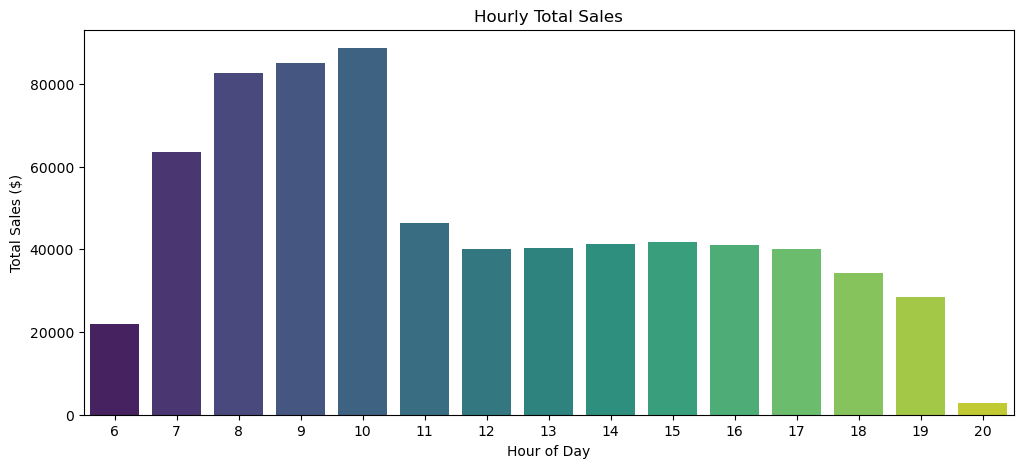

In [30]:
# Aggregate total sales by hour
hourly_sales = df.groupby('hour')['total_price'].sum()

# Bar plot
plt.figure(figsize=(12,5))
sns.barplot(x=hourly_sales.index, y=hourly_sales.values, palette="viridis")
plt.title("Hourly Total Sales")
plt.xlabel("Hour of Day")
plt.ylabel("Total Sales ($)")
plt.show()


We can observe a peak in sales during the morning hours, which is typical for a coffee shop.  
After 10 AM, sales gradually decline, maintaining a steady flow of customers.  
The lowest sales occur at 8 PM, which is also natural for this type of establishment.

Let's compare hourly sales across the entire coffee shop chain.

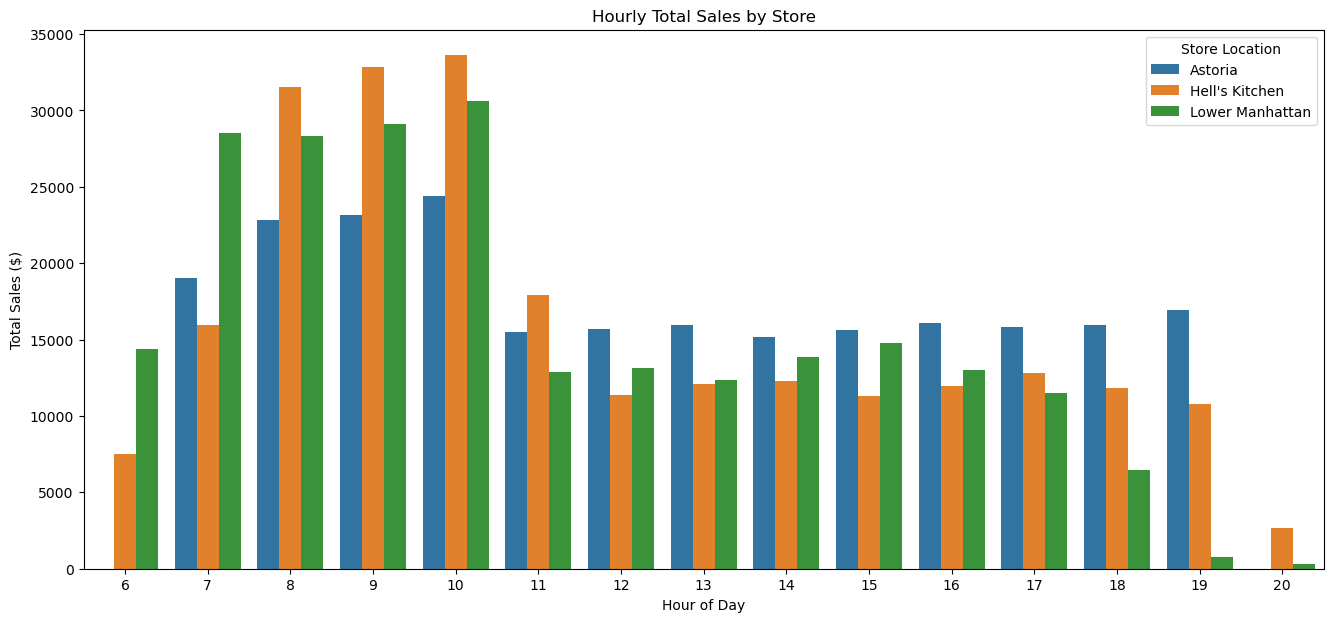

In [31]:
# Aggregate total sales by hour and by coffee shop
hourly_store_sales = df.groupby(['hour', 'store_location'])['total_price'].sum().reset_index()

plt.figure(figsize=(16,7))  # збільшене полотно
sns.barplot(
    data=hourly_store_sales,
    x='hour',
    y='total_price',
    hue='store_location',
    palette='tab10'
)

plt.title("Hourly Total Sales by Store")
plt.xlabel("Hour of Day")
plt.ylabel("Total Sales ($)")
plt.legend(title="Store Location")
plt.show()

### Hourly Sales by Coffee Shop

1️⃣ **Astoria** – primarily a residential area with high population density.  
From the visualization, we can infer that the coffee shop operates from 7:00 AM to 7:00 PM.

**Sales characteristics:** Morning hours (7–10 AM) show significant customer flow.  
Daytime and evening hours (12–7 PM) represent the highest sales across the chain.  
It may be worth reviewing the working hours; testing a schedule from 6:00 AM to 8:00 PM for a month could help decide whether to adjust operating hours based on sales.

2️⃣ **Hell’s Kitchen** – an area with a high concentration of offices, restaurants, and hotels.  
The coffee shop operates from 6:00 AM to 8:00 PM.

**Sales characteristics:**  
6–7 AM – the lowest sales in the chain  
8–11 AM – peak sales (highest in the chain)  
During the day – sales are often lower than the chain average

3️⃣ **Lower Manhattan** – the financial and business center of the city with many offices and corporate clients.  
The coffee shop operates from 6:00 AM to 8:00 PM.

**Sales characteristics:**  
7–10 AM – high sales (7 AM being the highest across the chain)  
During the day – expected decrease in sales  
7–8 PM – very low sales; these hours may be inefficient  
Evening demand is minimal as people leave offices and the area becomes sparsely populated. It may be reasonable to review operating hours after 6 PM.

**Recommendation:** Consider optimizing operating hours based on this analysis.


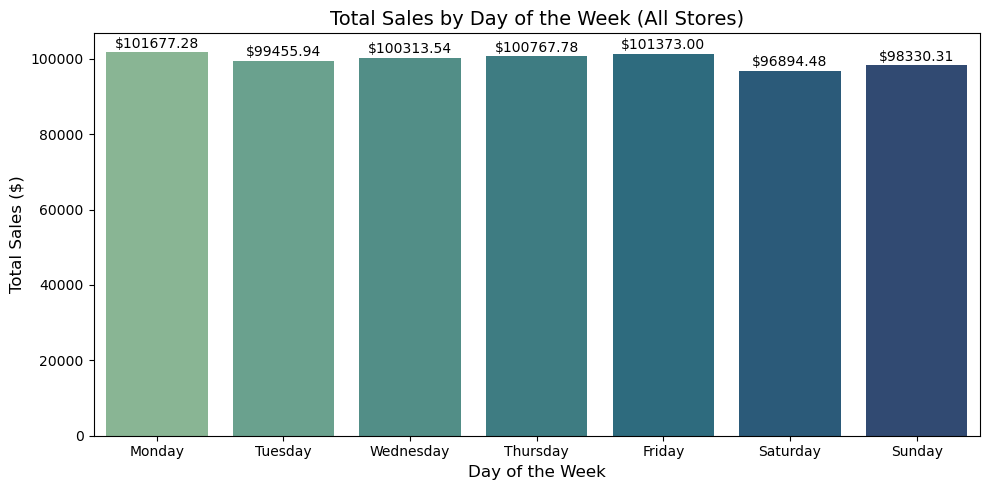

In [32]:
# Total sales by day of the week
weekday_sales = (
    df.groupby('weekday')['total_price']
    .sum()
    .reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
)

plt.figure(figsize=(10,5))
ax = sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="crest")

# Add title and axis labels
plt.title("Total Sales by Day of the Week (All Stores)", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)

# Display sales values above each bar
for container in ax.containers:
    ax.bar_label(container, fmt="$%.2f", label_type='edge', padding=1, fontsize=10)

plt.tight_layout()
plt.show()


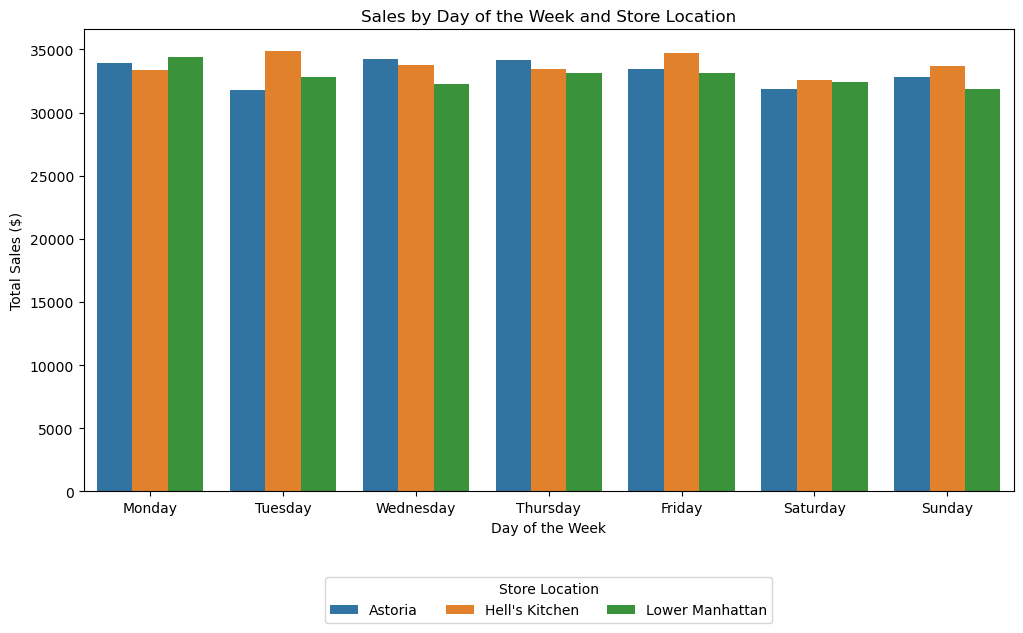

In [33]:
weekday_store_sales = (
    df.groupby(['store_location', 'weekday'])['total_price']
    .sum()
    .reset_index()
)

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12,6))
sns.barplot(
    data=weekday_store_sales,
    x='weekday',
    y='total_price',
    hue='store_location',
    order=order,
    palette='tab10'
)
plt.title("Sales by Day of the Week and Store Location")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales ($)")
plt.legend(title="Store Location", loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.show()


The analysis of sales by day of the week shows a stable pattern: there are no significant fluctuations, and demand is evenly distributed.

Across individual stores, the trend is similar — all locations exhibit consistent sales throughout the week.  
This indicates stable customer activity and simplifies planning for the chain's operations.  

For further analysis, we will save the file in CSV format and proceed to Tableau to build the dashboard.


In [34]:
df.to_csv("coffee_sales.csv", index=False)

## CONCLUSIONS

### Overall Sales Dynamics
The coffee shop chain generally demonstrates stable activity with minor fluctuations. Slight decreases coincided with weekends or holidays (notably, Memorial Day in May).

### Hourly Sales Distribution
The highest sales occur in the morning hours (7:00–10:00) — when people typically buy coffee on their way to work.  
In the afternoon, sales gradually decline, though some locations show evening peaks (5:00–8:00 PM), possibly due to leisure activities or evening meetings.

### Location Features
- **Astoria** — active in the morning, with the highest evening sales in the chain; this may indicate strong local demand from neighborhood residents.  
- **Hell’s Kitchen** — peak sales from 8:00 to 11:00, typical for business areas with many offices.  
- **Lower Manhattan** — high morning sales (peak at 7:00 AM), followed by a decline; evening activity is minimal, likely due to the area being oriented toward office workers.

### Average Check
The average check across the chain is stable throughout the week.  
Lower Manhattan shows a slight advantage in average check values.

### Product Categories
Coffee and tea account for the majority of sales, followed by baked goods, highlighting the key role of classic items in the coffee shops’ revenue.  
Other categories, while not top in sales volume, play an important role in the assortment — they expand customer choice and increase the average check.  
It is recommended to maintain a balance between main and supplementary categories while developing additional offerings.

---

## 📈 RECOMMENDATIONS

### Work Schedule Optimization
- In Lower Manhattan, consider reducing operating hours in the evening.  
- In Astoria, review the overall schedule and test operating hours from 6:00 AM to 8:00 PM.  
- Ensure additional staff support for the coffee shop if hours are extended.

### Marketing Opportunities
- Develop morning combo offers (coffee + baked goods) for the chain.  
- Introduce evening discounts on desserts or "second coffee" promotions.  
- Consider personalized promotions tailored to specific coffee shop locations.

### Product Assortment
- Expand the menu of the most popular categories — coffee drinks, tea, and baked goods.  
- Introduce seasonal beverages or limited-time offerings (e.g., cold brew in summer) to encourage repeat purchases.

### Ongoing Monitoring
- Track average check and sales metrics after
